<a href="https://colab.research.google.com/github/srikharshashi/make-more/blob/main/bigram-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic Bigram Language Modelling

In [1]:
!curl https://raw.githubusercontent.com/karpathy/makemore/master/names.txt --output names.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  222k  100  222k    0     0   665k      0 --:--:-- --:--:-- --:--:--  665k


In [2]:
words=open('names.txt','r').read().splitlines()

In [3]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
len(words)

32033

In [5]:
max(len(w) for w in words)

15

In [6]:
min(len(w) for w in words)

2

In [7]:
bigrams_dict={}
for word in words:
  chs=['<S>']+list(word)+['<E>']
  for ch1,ch2 in zip(chs,chs[1:]):
    bigram=(ch1,ch2)
    bigrams_dict[bigram]=bigrams_dict.get(bigram,0)+1
    # print(ch1,ch2)

In [8]:
bigrams_dict

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [9]:
sorted(bigrams_dict.items(),key= lambda kv:-kv[1])[:5]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983)]

In [10]:
import torch

In [11]:
a=torch.zeros((3,5))
a 

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [12]:
a.dtype

torch.float32

Let us actually represent our dictionary as 2D Matrix instead which maps 28 characters to 28 characters to get their counts 
(26 alphabets + `<S>` + `<E>`)

In [13]:
N=torch.zeros((28,28),dtype=torch.int32)

In [14]:
def get_index(ch):
  if(ch=="<S>"):
    return 26
  elif (ch=="<E>"):
    return 27
  else:
    return ord(ch)-ord('a')

In [15]:
def get_char(i):
  if(i==26):
     return "<S>"
  elif i==27:
    return "<E>"
  else:
    return chr(i+ord('a'))


In [16]:
for word in words:
  chs=['<S>']+list(word)+['<E>']
  for ch1,ch2 in zip(chs,chs[1:]):
    N[get_index(ch1)][get_index(ch2)]+=1

In [17]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

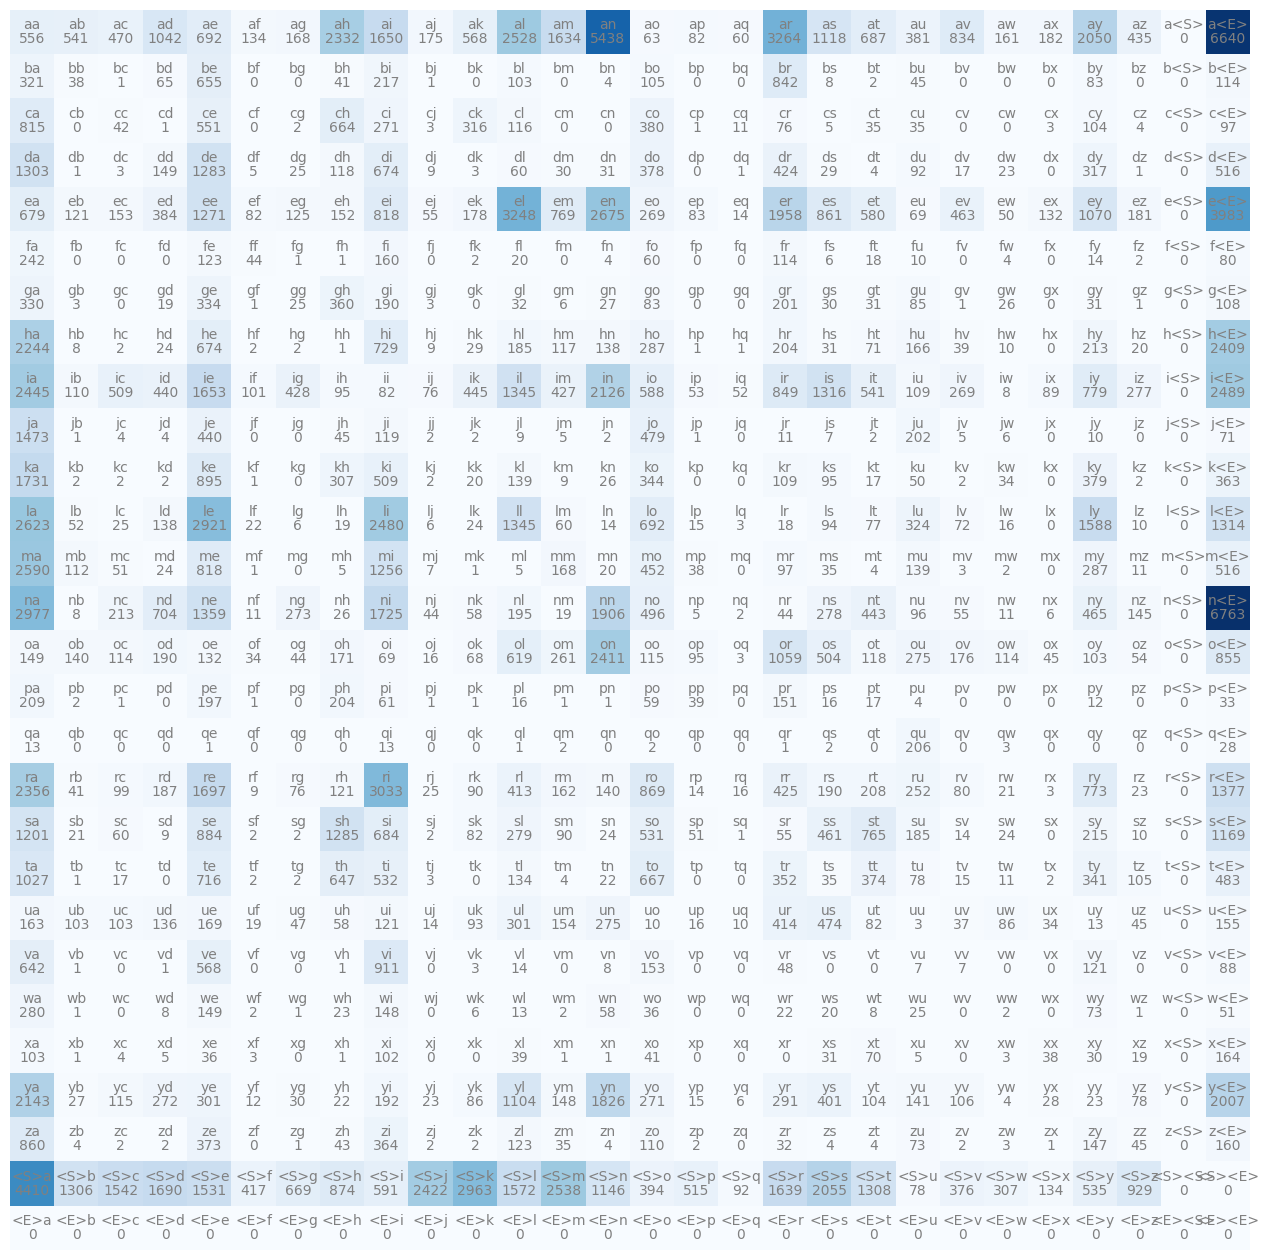

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,36))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = get_char(i) + get_char(j)
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');


- Um but as seen above There is a whole row of zeroes in the last and oen whole column as zeroes
- Saying there are no characters after end character and no characters before start character
- `<S><E>` is valid for an empty string 
- Let us change the encoding

In [19]:
N=torch.zeros((27,27),dtype=torch.int32)
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}

In [20]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [21]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [22]:
for word in words:
  chs=['.']+list(word)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    N[stoi[ch1]][stoi[ch2]]+=1

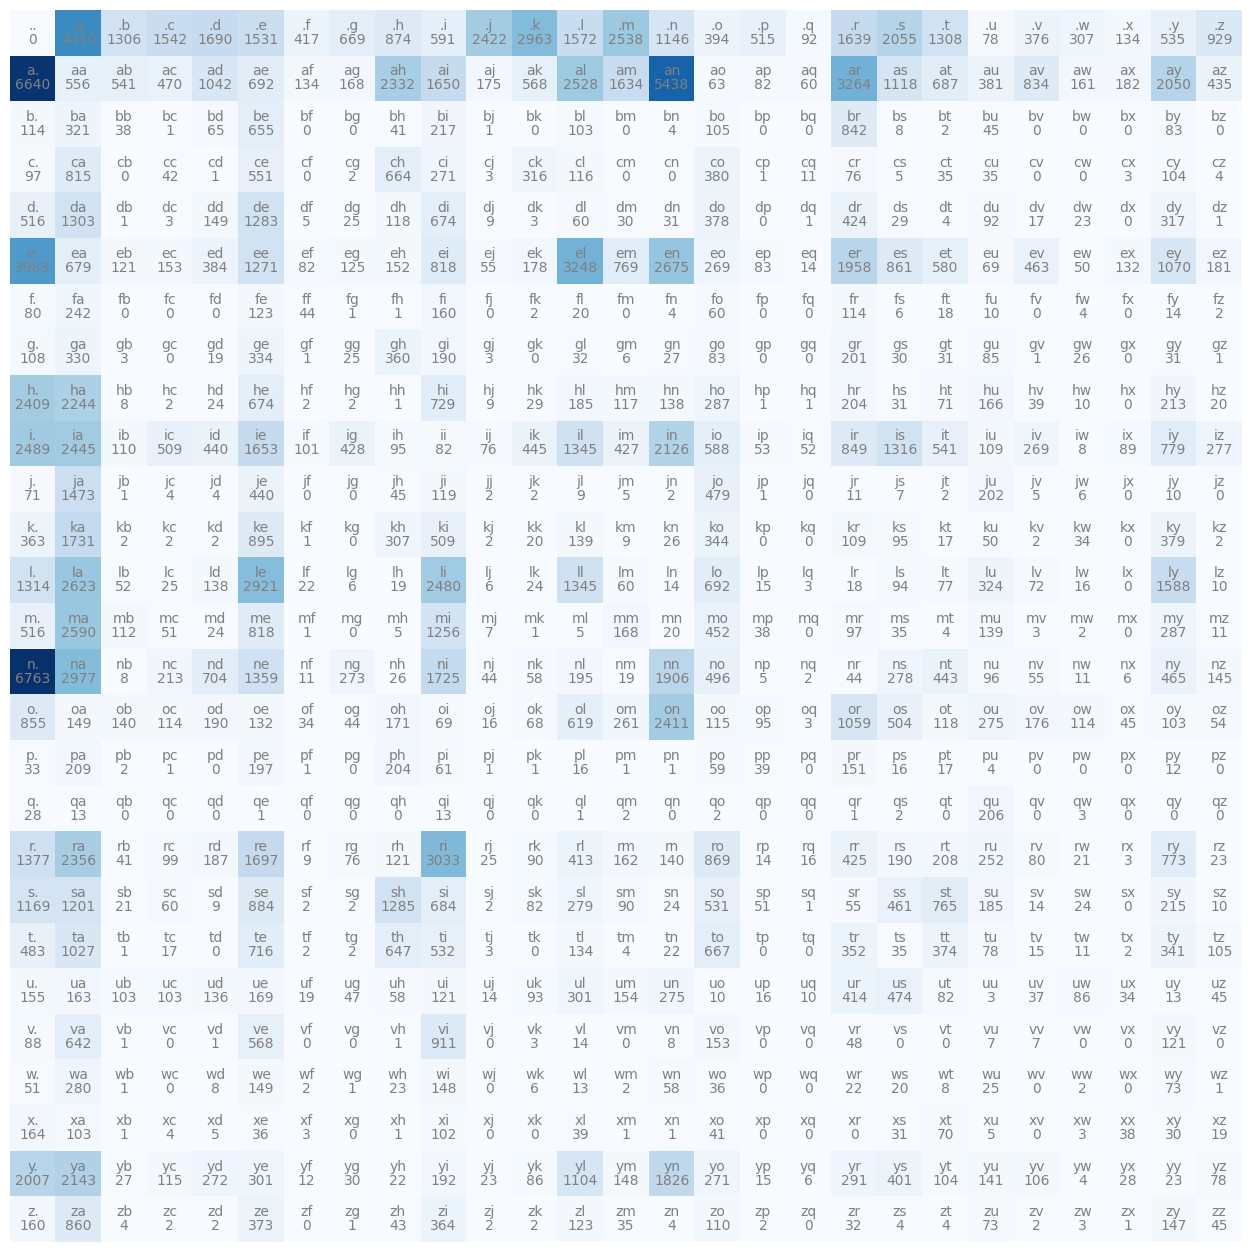

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');


In [24]:
N[0,:]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

- Normalize the dataset into distribution

In [25]:
# One row sample
p=N[0].float()
p=p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [26]:
# Sum of all rows in the datset
psum=N.sum(dim=1,keepdim=True )

In [27]:
# Discrete values normalized which form a distribution 
# Read up Torch Broadcasting Semantics
P=N/psum

In a way the ditribution we formed above is a model from which we can sample values 

In [28]:
# As you can see the matrix has been normalized 
P[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

- In a way the distribution is the model 

In [29]:
P.shape

torch.Size([27, 27])

In [30]:
gen=torch.Generator().manual_seed(2147483647)

- Sample from the model

In [31]:
for i in range(10):
  out=[]
  ix=0
  while True:
    p=P[ix]
    ix=torch.multinomial(p,num_samples=1,replacement=True,generator=gen).item()
    out.append(itos[ix])
    if(ix==0):
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


Evaluate the Model somehow

In [32]:
#log(a*b*c)=log(a)+log(b)+log(c)

Predicting probability of a name existing from a given corpus 

In [33]:
import math
log_likelyhood=0.0
n=0
for word in words[:3]:
  chs=['.']+list(word)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    prob=P[stoi[ch1]][stoi[ch2]].item()
    logprob=round(math.log(prob),4)
    log_likelyhood+=logprob 
    n+=1
    print(ch1+ch2," : " ,round(prob,4)," ",logprob)

print("log_likelyhood",log_likelyhood/n)
anll=-log_likelyhood/n
print("avg log_likelyhood",anll)
# Average Negative LogLikely hood is a Loss Function which should be (minimized -->GOAL) 


.e  :  0.0478   -3.0408
em  :  0.0377   -3.2793
mm  :  0.0253   -3.6772
ma  :  0.3899   -0.9418
a.  :  0.196   -1.6299
.o  :  0.0123   -4.3982
ol  :  0.078   -2.5508
li  :  0.1777   -1.7278
iv  :  0.0152   -4.1867
vi  :  0.3541   -1.0383
ia  :  0.1381   -1.9796
a.  :  0.196   -1.6299
.a  :  0.1377   -1.9829
av  :  0.0246   -3.7045
va  :  0.2495   -1.3882
a.  :  0.196   -1.6299
log_likelyhood -2.4241124999999997
avg log_likelyhood 2.4241124999999997


### While using Log Likely hood tthere is a chance that probability is zero which leaded to infinite log instead
### See the example below ... it makes a math domain error ... to solve this we use model smoothing

In [34]:
try: 
  import math
  log_likelyhood=0.0
  n=0
  for word in ["andrejq"]:
    chs=['.']+list(word)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
      prob=P[stoi[ch1]][stoi[ch2]].item()
      logprob=round(math.log(prob),4)
      log_likelyhood+=logprob 
      n+=1
      print(ch1+ch2," : " ,round(prob,4)," ",logprob)

  print("log_likelyhood",log_likelyhood/n)
  anll=-log_likelyhood/n
  print("avg log_likelyhood",anll)
except  ValueError:
  print("Value Error")

.a  :  0.1377   -1.9829
an  :  0.1605   -1.8296
nd  :  0.0384   -3.2594
dr  :  0.0771   -2.562
re  :  0.1336   -2.0127
ej  :  0.0027   -5.9171
Value Error


In [35]:
# P but smmothed out using a value 1 so that no zero values ever exist
PS=(N+1).float()
PS /= P.sum(1,keepdims=True)

In [36]:
# The output of this model is now some value instead of an infinite value
import math
log_likelyhood=0.0
n=0
for word in ["andrejq"]:
  chs=['.']+list(word)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    prob=PS[stoi[ch1]][stoi[ch2]].item()
    logprob=round(math.log(prob),4)
    log_likelyhood+=logprob 
    n+=1
    print(ch1+ch2," : " ,round(prob,4)," ",logprob)

print("log_likelyhood",log_likelyhood/n)
anll=-log_likelyhood/n
print("avg log_likelyhood",anll)

.a  :  4411.0   8.3919
an  :  5439.0   8.6014
nd  :  705.0   6.5582
dr  :  425.0   6.0521
re  :  1698.0   7.4372
ej  :  56.0   4.0254
jq  :  1.0   0.0
q.  :  29.0   3.3673
log_likelyhood 5.554187499999999
avg log_likelyhood -5.554187499999999


- Now that we are done with a basic implementation of the bigram model let 
us build up on a neural network approach

- The neural network is gonna predict what the next character will be given one character 

In [37]:
# Create a dataset 
xs=[]
ys=[]

for word in words[:1]:
  chs=['.']+list(word)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    xs.append(stoi[ch1])
    ys.append(stoi[ch2])

xs=torch.tensor(xs)
ys=torch.tensor(ys)

In [38]:
xs

tensor([ 0,  5, 13, 13,  1])

In [39]:
ys

tensor([ 5, 13, 13,  1,  0])

In [40]:
xs.shape,ys.shape

(torch.Size([5]), torch.Size([5]))

- We can't feed the data as integer but need to encode it as vectors by one hot encoding which will then be fed to the network
- We want our dtypes to be floating points before inputting into a NN

In [41]:
import torch.nn.functional as F
xenc=F.one_hot(xs,num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [42]:
 xenc.shape

torch.Size([5, 27])

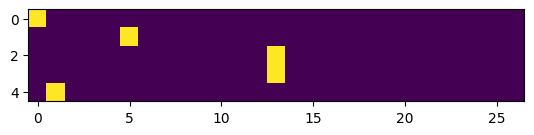

In [43]:
plt.imshow(xenc[:5])

In [44]:
xenc.dtype

torch.float32

The NN consits of one layer with no activation 

In [45]:
W=torch.randn((27,27))
logcounts=xenc @ W #logits
logcounts

tensor([[-1.2114, -1.2407, -1.3369,  0.3569,  1.3949, -0.7425, -0.6389, -0.6271,
         -0.8505, -0.7983, -0.0734, -0.2140, -1.9311, -1.0609,  0.4592, -0.2471,
          0.5535, -0.0356,  0.2717,  0.1737, -0.9113, -0.6164, -1.6901,  0.0765,
         -0.2854, -0.0627,  0.2452],
        [ 0.9870,  1.8961,  0.9223,  0.3375,  1.4419,  0.9796, -0.2678, -1.4011,
         -0.0252,  1.4180, -0.0830,  0.3730,  2.0156, -0.3434, -1.1998,  0.2841,
         -1.8138, -1.0829,  0.8902,  0.1026, -1.2814,  1.1353, -0.1115,  0.3666,
         -0.3414,  0.3599, -0.5067],
        [-1.2815, -0.4313, -0.1807,  0.2395,  0.5486,  0.1509, -0.5408, -2.8645,
         -0.1927,  1.7042, -0.0661, -1.4469, -0.7102,  1.8305,  0.6459, -0.2817,
         -0.5981,  0.4759,  1.0552, -2.0330, -1.1146, -0.5408,  0.5713,  0.1730,
          0.0715, -1.6215, -1.5477],
        [-1.2815, -0.4313, -0.1807,  0.2395,  0.5486,  0.1509, -0.5408, -2.8645,
         -0.1927,  1.7042, -0.0661, -1.4469, -0.7102,  1.8305,  0.6459, -0.2817

define a **softmax**

In [46]:
counts=logcounts.exp()
counts

tensor([[0.2978, 0.2892, 0.2627, 1.4288, 4.0345, 0.4759, 0.5279, 0.5341, 0.4272,
         0.4501, 0.9292, 0.8073, 0.1450, 0.3461, 1.5829, 0.7811, 1.7393, 0.9650,
         1.3122, 1.1897, 0.4020, 0.5399, 0.1845, 1.0795, 0.7517, 0.9392, 1.2778],
        [2.6833, 6.6601, 2.5151, 1.4014, 4.2287, 2.6634, 0.7651, 0.2463, 0.9751,
         4.1290, 0.9203, 1.4521, 7.5050, 0.7093, 0.3013, 1.3285, 0.1630, 0.3386,
         2.4355, 1.1080, 0.2776, 3.1121, 0.8945, 1.4428, 0.7108, 1.4332, 0.6025],
        [0.2776, 0.6496, 0.8346, 1.2706, 1.7307, 1.1629, 0.5823, 0.0570, 0.8248,
         5.4969, 0.9361, 0.2353, 0.4915, 6.2368, 1.9077, 0.7545, 0.5498, 1.6095,
         2.8726, 0.1309, 0.3281, 0.5823, 1.7706, 1.1888, 1.0741, 0.1976, 0.2127],
        [0.2776, 0.6496, 0.8346, 1.2706, 1.7307, 1.1629, 0.5823, 0.0570, 0.8248,
         5.4969, 0.9361, 0.2353, 0.4915, 6.2368, 1.9077, 0.7545, 0.5498, 1.6095,
         2.8726, 0.1309, 0.3281, 0.5823, 1.7706, 1.1888, 1.0741, 0.1976, 0.2127],
        [0.3667, 1.3857,

Normalize by row

In [47]:
probs=counts/counts.sum(1,keepdims=True)
probs

tensor([[0.0126, 0.0122, 0.0111, 0.0603, 0.1702, 0.0201, 0.0223, 0.0225, 0.0180,
         0.0190, 0.0392, 0.0341, 0.0061, 0.0146, 0.0668, 0.0330, 0.0734, 0.0407,
         0.0554, 0.0502, 0.0170, 0.0228, 0.0078, 0.0455, 0.0317, 0.0396, 0.0539],
        [0.0526, 0.1306, 0.0493, 0.0275, 0.0829, 0.0522, 0.0150, 0.0048, 0.0191,
         0.0810, 0.0180, 0.0285, 0.1471, 0.0139, 0.0059, 0.0260, 0.0032, 0.0066,
         0.0478, 0.0217, 0.0054, 0.0610, 0.0175, 0.0283, 0.0139, 0.0281, 0.0118],
        [0.0082, 0.0191, 0.0246, 0.0374, 0.0510, 0.0342, 0.0171, 0.0017, 0.0243,
         0.1618, 0.0276, 0.0069, 0.0145, 0.1836, 0.0562, 0.0222, 0.0162, 0.0474,
         0.0846, 0.0039, 0.0097, 0.0171, 0.0521, 0.0350, 0.0316, 0.0058, 0.0063],
        [0.0082, 0.0191, 0.0246, 0.0374, 0.0510, 0.0342, 0.0171, 0.0017, 0.0243,
         0.1618, 0.0276, 0.0069, 0.0145, 0.1836, 0.0562, 0.0222, 0.0162, 0.0474,
         0.0846, 0.0039, 0.0097, 0.0171, 0.0521, 0.0350, 0.0316, 0.0058, 0.0063],
        [0.0122, 0.0463,

In [48]:
probs.shape

torch.Size([5, 27])

- This was forward propgation
- Next step is to define a good loss function and backpropgate the error 

In [49]:
nlls = torch.zeros(10)
for i in range(10):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())


--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0126, 0.0122, 0.0111, 0.0603, 0.1702, 0.0201, 0.0223, 0.0225, 0.0180,
        0.0190, 0.0392, 0.0341, 0.0061, 0.0146, 0.0668, 0.0330, 0.0734, 0.0407,
        0.0554, 0.0502, 0.0170, 0.0228, 0.0078, 0.0455, 0.0317, 0.0396, 0.0539])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.020080817863345146
log likelihood: -3.9079902172088623
negative log likelihood: 3.9079902172088623
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0526, 0.1306, 0.0493, 0.0275, 0.0829, 0.0522, 0.0150, 0.0048, 0.0191,
        0.0810, 0.0180, 0.0285, 0.1471, 0.0139, 0.0059, 0.0260, 0.0032, 0.0066,
        0.0478, 0.0217, 0.0054, 0.0610, 0.0175, 0.0283, 0.0139, 0.0281, 0.0118])
label (actual next character): 13
probability assigned by the net to the the correct character:

IndexError: ignored

In [50]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


In [51]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()


In [52]:
print(loss.item())

3.7693049907684326


In [53]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [54]:
W.data += -0.1 * W.grad

In [55]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


number of examples:  228146


In [56]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad


3.7686190605163574
3.3788065910339355
3.16109037399292
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188303470611572
2.696505546569824
2.6773719787597656
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711236000061035
2.5662729740142822
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.550442695617676
2.5471925735473633
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536262035369873
2.5339581966400146
2.531797409057617
2.529768228530884
2.527859926223755
2.5260636806488037
2.5243701934814453
2.522773265838623
2.52126407623291
2.519836902618408
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137407779693604
2.512697696685791
2.511704921722412
2.5107581615448
2.509854555130005
2.5089924335479736
2.5081682205200195
2.507380485534668


In [57]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))


junide.
janasah.
p.
cfay.
a.
